# L2 Congestion Scenarios 

In [1]:
import plotly.io as pio
pio.renderers.default = "png"

import sys
sys.path.append('../')

from aztec_gddt.analysis.execute import execute_sim, complexity_desc
from aztec_gddt.analysis.visualizations import plot_agg_kpis, plot_inspect_vars
from aztec_gddt.analysis.metrics import *
from aztec_gddt.scenario_experiments import *

import gcsfs
fs = gcsfs.GCSFileSystem()

## Summary

The L2 Congestion scenario evaluates the relationship between network congestion measures and mana limits (target mana limit and hard mana limit per block) when different oracle control parameters are adjusted. 
The parametrization of maximum and target mana per block will partially be driven by engineering tradeoffs, yet it is necessary to understand their impacts on congestion and profitability of service providers. Several variables can influence these outcomes, including different oracle parameter values resulting from network conditions and the target and maximum mana per block values impacting the congestion component of the fee mechanism. 
This scenario aims to understand how these factors influence network performance and congestion levels.

## Scenario 1 

In [2]:
# exp_spec = experiment_l2_congestion

# # Override default configuration
# exp_spec.N_timesteps = 1_000
# exp_spec.N_samples = 1
# exp_spec.N_config_sample = 10

# CONTROL_PARAMS = list(exp_spec.params_swept_control.keys())

# sim_df, exec_time = execute_sim(exp_spec.prepare())
# agg_df, c_agg_df = retrieve_feature_df(sim_df, CONTROL_PARAMS, exp_spec.relevant_per_trajectory_group_metrics)


path = 'gs://aztec-gddt-v2-sim/L2C-SG/2025-01-31T14:09:09Z/'

with fs.open(path + 'spec.json', 'r') as fid:
    exp_spec = ExperimentParamSpec.from_json(fid.read()) # type: ginore

sim_df = pd.read_pickle(path + 'timestep_tensor-0.pkl.gz')
agg_df = pd.read_pickle(path + 'trajectory_tensor.pkl.gz')
c_agg_df = compute_agg_df(exp_spec.relevant_per_trajectory_group_metrics, agg_df)

### Objective 

### Experimental Setup

#### Testing Variables: 

##### Environmental:
:dart: we should check tthe below variables 

- Simulating transactions based on varying user maximum mana amounts
- (Potential) Congestion scenarios:  
    i) Varying sequencer profitability conditions  
    ii) Different oracle parameter values affecting transaction inclusion

##### Protocol: 

- Assess the impact of mana limits on network congestion. This scenario tests various parameter choices related to mana usage and oracle controls. Key parameters include:  
    i) TARGET_MANA_PER_BLOCK_C - The intended average mana usage per block  
    ii) MAXIMUM_MANA_PER_BLOCK_C - The hard limit on mana usage per block  
    iii) Oracle parameters affecting transaction costs and inclusion

#### Simulation input/output per Monte Carlo run:

##### Input:
- Resulting transactions from varying user maximum mana amounts, sequencer profitability conditions, and oracle parameter values. These inputs are used to assess the impact on network congestion.

##### Output:  
- Time series for finalized blocks/epochs, measured according to the level of congestion (i.e., the actually attained mana use).
- Monte Carlo M runs indexed by m:  
For each parameter constellation of interest, we draw M realizations of the sequencer's (check) maximum mana price they are willing to pay. Additionally, for each transaction, draw the maximum mana amount the transaction can use.

#### Simulation behavior
- A sequencer will not post a block to L1 if the revenue from the block is less than the cost of posting the block
- Any transaction whose maximum mana amount is less than the estimated base fee is not included in a block.

#### Sweep Parameters:
:dart: fill in  

 Refer to the [spreadsheet](https://docs.google.com/spreadsheets/d/1EbW4sEYWb7iCjOYfgivNsLxe1O6ZFYwFSsRQjfiPLTM/edit?gid=955157985#gid=955157985&range=A1) for detailed parameter configurations related to staking and slashing mechanisms.

##### Control:

In [3]:
exp_spec.print_control_params()

RELATIVE_TARGET_MANA_PER_BLOCK: [0.5, 0.9]
MAXIMUM_MANA_PER_BLOCK: [20000000, 40000000]


##### Environmental:

In [4]:
exp_spec.print_env_params()

SEQUENCER_L1_GAS_PRICE_THRESHOLD_E: [100, 1000]
TOTAL_MANA_MULTIPLIER_E: [1.0, 10.0]


#### Simulation Behavior: 

#### Threshold Inequalities:

#### Metrics:

1. **Percentage Near Target:**
    
    - Compute the percentage of MC runs where the actual average mana used per block was within some percentage of the TARGET_MANA_PER_BLOCK_C control variable.
    - Interpretation: A low value implies that the system was not operating at its intended target, as mana used in a block was on average far above or far below the TARGET_MANA_PER_BLOCK_C value.
    
2. **Percentage Near Limit:**
    
    - Compute the percentage of MC runs where the actual average mana used per transaction was within some percentage of the MAXIMUM_MANA_PER_BLOCK_C control variable.
    - Interpretation: A high value implies that the system exhibited high congestion.

### Computational Complexity

In [5]:
print(complexity_desc(exp_spec))


    #### Computational Complexity:
    1. Total number of parameter combinations: 16
    2. Total number of Monte Carlo runs per parameter combination: 50
    3. Total number of trajectories: 800
    4. Total number of timesteps per trajectory: 3,000
    5. Total number of state measurements: 2,400,000
    


### Simulation Results 

:::info
See [main doc](https://hackmd.io/@blockscience/B1QKItvEye) for copyable explanations (or referenceable)
:::

- [ ] :dart: Write descriptive interpretation over the plot below :dart: 
- [ ] :dart: Generate an analogue plot below for the results :dart:

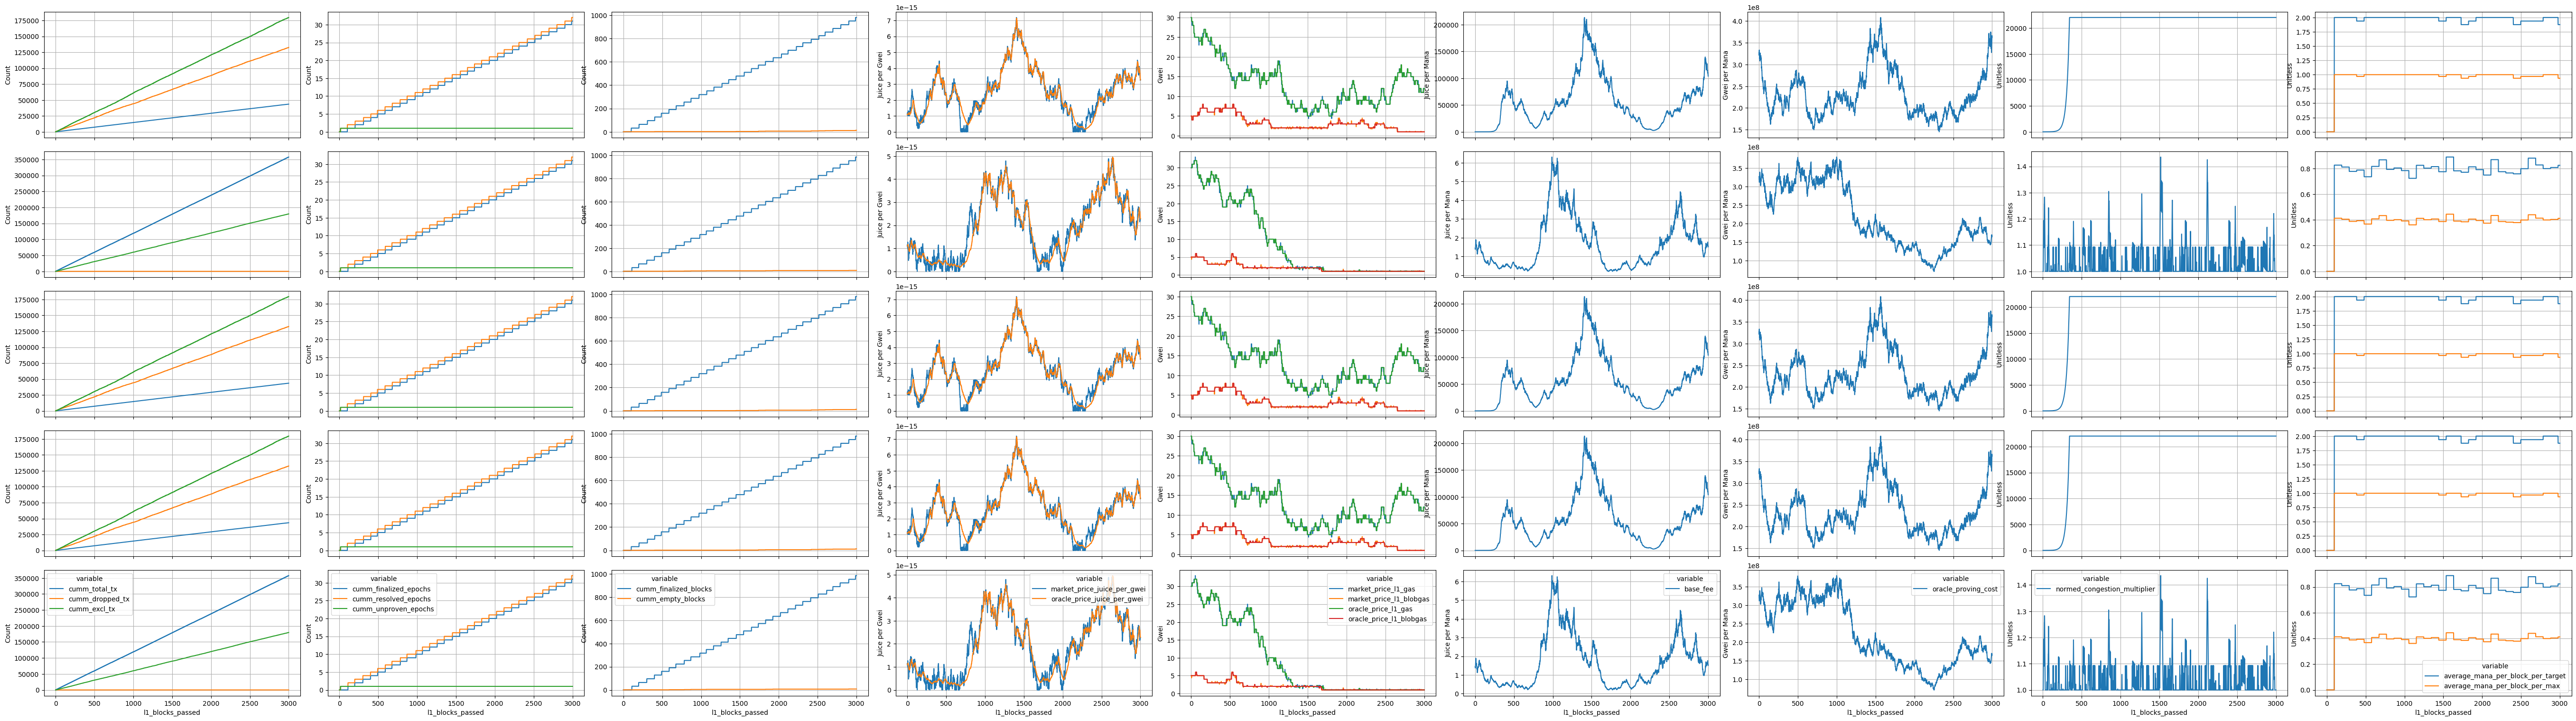

In [6]:
plot_inspect_vars(sim_df)

### Protocol Parameter Recommendations 

:::info
See [main doc](https://hackmd.io/@blockscience/B1QKItvEye) for copyable explanations (or referenceable)
:::

- [ ] :dart: Write descriptive interpretation over table :dart: 
- [ ] :dart: Generate an analogue table below for the results :dart: 


| Control Parameter | Recommended Range | Unit |
| - | - | - |
| RELATIVE_TARGET_MANA_PER_BLOCK | tbd | Mana |
| MAXIMUM_MANA_PER_BLOCK | tbd | Mana |
| MINIMUM_MULTIPLIER_CONGESTION | tbd | Unitless |
| UPDATE_FRACTION_CONGESTION | tbd | 1 / Mana |
| OVERHEAD_MANA_PER_TX | tbd | Mana |
| PROVING_COST_MODIFIER_INITIAL_C | tbd | Mana |
| FEE_JUICE_PRICE_MODIFIER_INITIAL_C | tbd | Juice per Gwei |
| MAXIMUM_UPDATE_PERCENTAGE_C | tbd | Unitless | 

### Decision Tree and Parameter Importance

:::info
See [main doc](https://hackmd.io/@blockscience/B1QKItvEye) for copyable explanations (or referenceable)
:::
- [ ] :dart: Write descriptive interpretation over the plot below :dart: 
- [ ] :dart: Generate an analogue plot below for the results :dart:

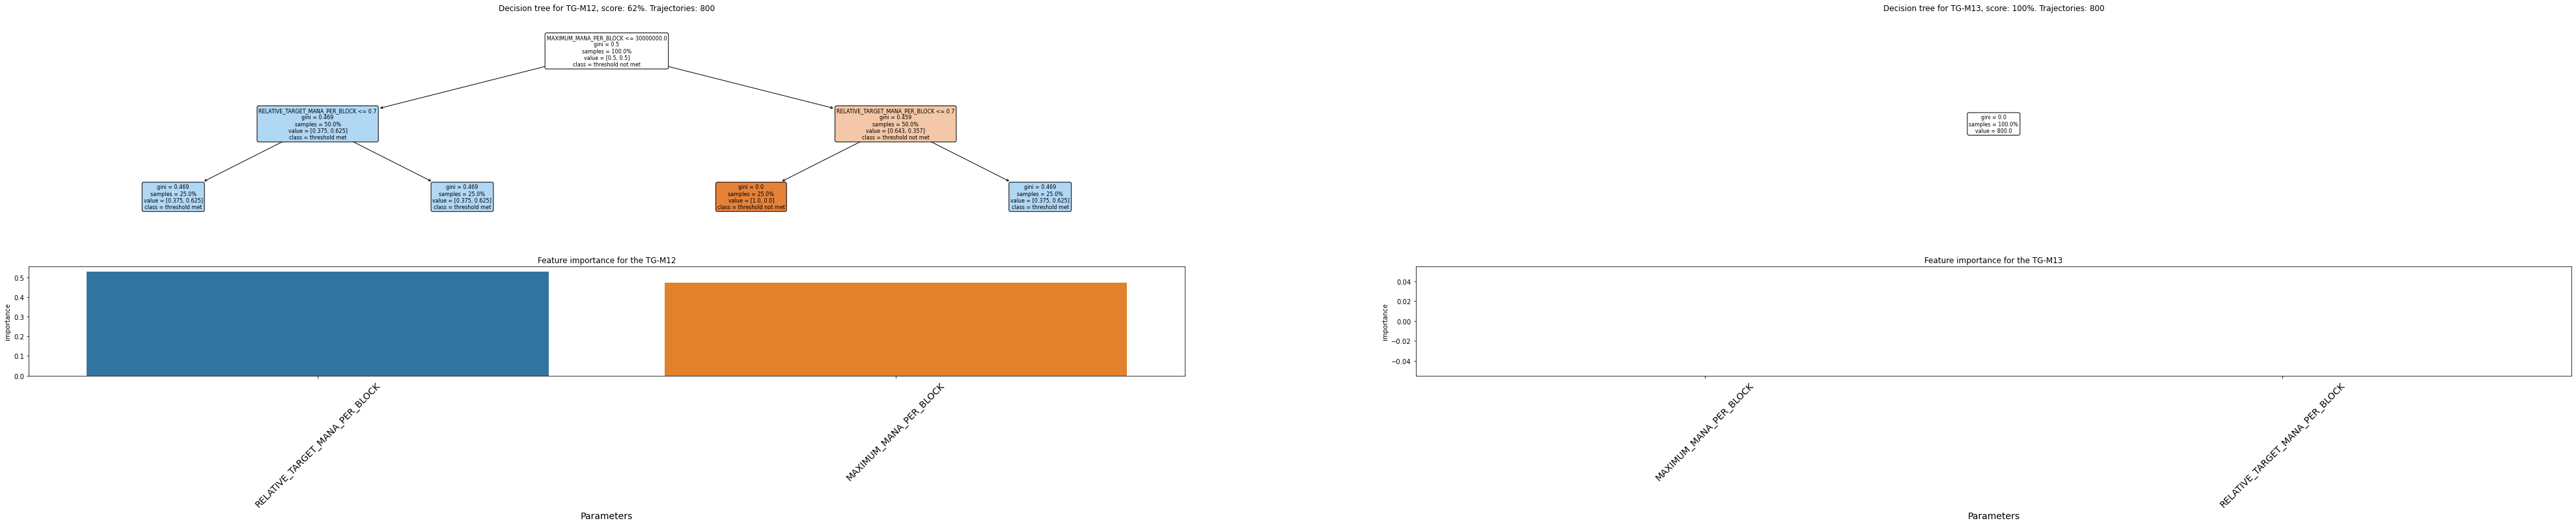

In [7]:
plot_agg_kpis(c_agg_df, exp_spec.params_swept_control, exp_spec.relevant_per_trajectory_group_metrics)

### Commentary on Results:

:dart: Write anything that comes up to mind based on the interpretation over all the results :dart: 

## Conclusion

- [ ] 🔫 Jakob owns after Danilo wrote commentary on results 🔫

## Appendix:
### Parameter Impact on Metrics: 